<a href="https://colab.research.google.com/github/Sivasurya-J/DataScienceAcademicProjects/blob/main/Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading** **Dataset**

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

**Description of the Dataset**

In [2]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
digits.target[::100]

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

In [4]:
digits.data.shape

(1797, 64)

In [5]:
digits.target.shape

(1797,)

In [6]:
digits.images[13]

array([[ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.],
       [ 0.,  4., 13.,  8.,  9., 16.,  8.,  0.],
       [ 0.,  0.,  0.,  6., 14., 15.,  3.,  0.],
       [ 0.,  0.,  0., 11., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2., 15.,  4.,  0.],
       [ 0.,  1.,  5.,  6., 13., 16.,  6.,  0.],
       [ 0.,  2., 12., 12., 13., 11.,  0.,  0.]])

In [7]:
digits.data[13]

array([ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.,  0.,  4., 13.,  8.,  9.,
       16.,  8.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,  0.,  0.,  0.,
        0., 11., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,
        0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  1.,  5.,  6.,
       13., 16.,  6.,  0.,  0.,  2., 12., 12., 13., 11.,  0.,  0.])

**Visualization of the Data**

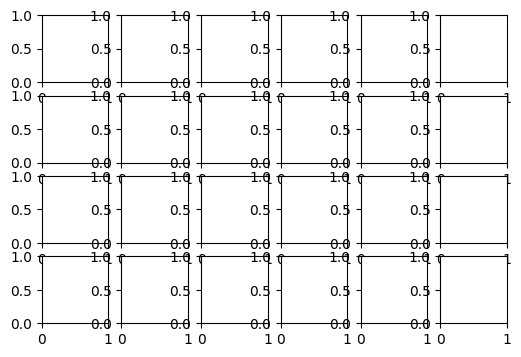

In [8]:
import matplotlib.pyplot as plt
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

In [9]:
for item in zip(axes.ravel(), digits.images, digits.target):
  axes, image, target = item
  axes.imshow(image, cmap=plt.cm.gray_r)
  axes.set_xticks([])
  axes.set_yticks([])
  axes.set_title(target) 
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

**Train - Test Split**

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=11)

In [11]:
X_train.shape, X_test.shape

((1347, 64), (450, 64))

**Creating the Model**

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

**Testing the Model**

In [13]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

**Predicting the Classes**

In [14]:
predicted = knn.predict(X=X_test)
expected = y_test

In [15]:
predicted[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6])

In [16]:
expected[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6])

In [17]:
wrong = [(p,e) for (p,e) in zip(predicted, expected) if p != e]
wrong

[(5, 3),
 (8, 9),
 (4, 9),
 (7, 3),
 (7, 4),
 (2, 8),
 (9, 8),
 (3, 8),
 (3, 8),
 (1, 8)]

**Calculating Metrics**

*1. Estimator Method Score*

In [18]:
print(f'{knn.score(X_test, y_test):.2%}')

97.78%


*2. Confusion Matrix*

In [19]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true=expected, y_pred=predicted)
confusion

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  1,  1,  2,  0,  0,  0,  0, 39,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 41]])

*3. Classification Report*

In [20]:
from sklearn.metrics import classification_report

names = [str(digit) for digit in digits.target_names]
print(classification_report(expected, predicted, target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        45
           2       0.98      1.00      0.99        54
           3       0.95      0.95      0.95        44
           4       0.98      0.98      0.98        50
           5       0.97      1.00      0.99        38
           6       1.00      1.00      1.00        42
           7       0.96      1.00      0.98        45
           8       0.97      0.89      0.93        44
           9       0.98      0.95      0.96        43

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



**Visualization of Confusion Matrix**

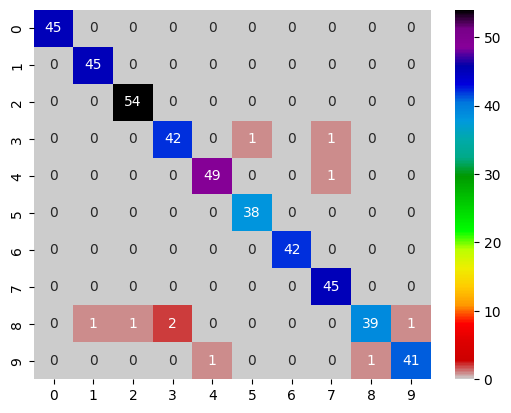

In [21]:
import pandas as pd
confusion_df = pd.DataFrame(confusion, index=range(10), columns=range(10))

import seaborn as sns
axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')

**K_Fold Cross Validation**

In [22]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

In [23]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=knn, X=digits.data, y=digits.target, cv=kfold)

In [24]:
scores

array([0.97777778, 0.99444444, 0.98888889, 0.97777778, 0.98888889,
       0.99444444, 0.97777778, 0.98882682, 1.        , 0.98324022])

In [25]:
print(f'Mean accuracy: {scores.mean():.2%}')

print(f'Accuracy standard deviation: {scores.std():.2%}')

Mean accuracy: 98.72%
Accuracy standard deviation: 0.75%


In [26]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [27]:
estimators = {'KNeighborsClassifier': knn, 'SVC': SVC(gamma='scale'), 'GaussianNB': GaussianNB()}

In [28]:
for estimator_name, estimator_object in estimators.items():
  kfold = KFold(n_splits=10, random_state=11, shuffle=True)
  scores = cross_val_score(estimator=estimator_object, X=digits.data, y=digits.target, cv=kfold)
  print(f'{estimator_name:>20}: ' +
        f'mean accuracy={scores.mean():.2%}; ' +
        f'standard deviation={scores.std():.2%}')

KNeighborsClassifier: mean accuracy=98.72%; standard deviation=0.75%
                 SVC: mean accuracy=98.72%; standard deviation=0.79%
          GaussianNB: mean accuracy=84.48%; standard deviation=3.47%


**HyperParameter Tuning**

In [29]:
for k in range(1, 20, 2):
  kfold = KFold(n_splits=10, random_state=11, shuffle=True)
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(estimator=knn, X=digits.data, y=digits.target, cv=kfold)
  print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; ' +
        f'standard deviation={scores.std():.2%}')

k=1 ; mean accuracy=98.83%; standard deviation=0.58%
k=3 ; mean accuracy=98.83%; standard deviation=0.72%
k=5 ; mean accuracy=98.72%; standard deviation=0.75%
k=7 ; mean accuracy=98.44%; standard deviation=0.96%
k=9 ; mean accuracy=98.39%; standard deviation=0.80%
k=11; mean accuracy=98.39%; standard deviation=0.80%
k=13; mean accuracy=97.89%; standard deviation=0.89%
k=15; mean accuracy=97.89%; standard deviation=1.02%
k=17; mean accuracy=97.50%; standard deviation=1.00%
k=19; mean accuracy=97.66%; standard deviation=0.96%


*****Dimensionality Reduction*****

In [30]:
digits1 = load_digits()

In [31]:
from sklearn.manifold import TSNE

In [33]:
tsne = TSNE(n_components=2, random_state=11)

In [34]:
reduced_data = tsne.fit_transform(digits.data)

In [35]:
reduced_data.shape

(1797, 2)

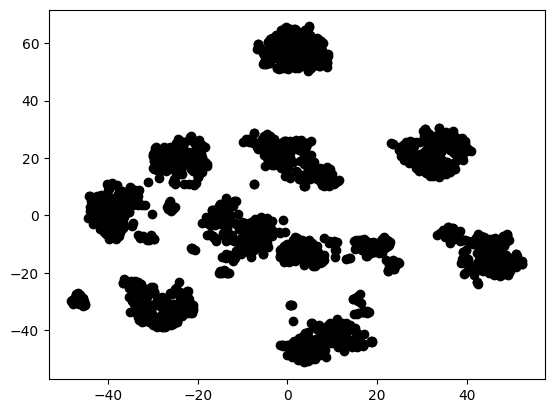

In [36]:
import matplotlib.pyplot as plt
dots = plt.scatter(reduced_data[:, 0], reduced_data[:,1], c='black')

<ipython-input-38-261e5d5cb8f9>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  dots = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=digits.target, cmap=plt.cm.get_cmap('nipy_spectral_r', 10))


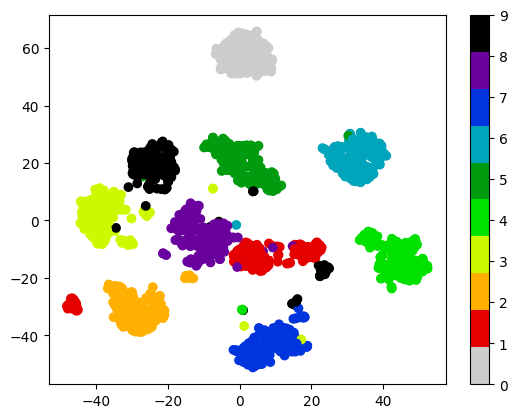

In [38]:
dots = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=digits.target, cmap=plt.cm.get_cmap('nipy_spectral_r', 10))
colorbar = plt.colorbar(dots)

In [ ]:
col